# Libs

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart)
library(rpart.plot)

# Dados

In [ ]:
data <- read.csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/DadoseDecisoes.csv')
head(data)

,ID,Idade,Gênero,Departamento,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>
1,1,34,Masculino,RH,3848.89,36,84.89,94.33,0,4,Não
2,2,39,Feminino,Vendas,2536.32,48,107.84,98.62,4,9,Sim
3,3,39,Masculino,Marketing,7377.81,44,95.66,80.23,11,6,Sim
4,4,27,Feminino,Vendas,2536.32,40,88.89,94.63,8,1,Sim
5,5,41,Feminino,Vendas,2536.32,37,80.97,86.44,11,12,Não
6,6,39,Feminino,Vendas,2536.32,36,81.80,73.90,2,4,Não


In [ ]:
attach(data)

In [ ]:
head(data,40)

,ID,Idade,Gênero,Departamento,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>
1,1,34,Masculino,RH,3848.89,36,84.89,94.33,0,4,Não
2,2,39,Feminino,Vendas,2536.32,48,107.84,98.62,4,9,Sim
3,3,39,Masculino,Marketing,7377.81,44,95.66,80.23,11,6,Sim
4,4,27,Feminino,Vendas,2536.32,40,88.89,94.63,8,1,Sim
5,5,41,Feminino,Vendas,2536.32,37,80.97,86.44,11,12,Não
6,6,39,Feminino,Vendas,2536.32,36,81.80,73.90,2,4,Não
7,7,44,Feminino,TI,22417.62,48,108.49,77.47,15,12,Sim
8,8,37,Feminino,RH,6396.44,40,89.92,100.00,8,2,Sim
9,9,33,Feminino,Marketing,9751.26,40,97.09,100.00,6,17,Sim


# Arvore

In [ ]:
target = function(x, y) {
  return (paste(name(y), " ~", paste(names(x), collapse = " + ")))
}

In [ ]:
# Criar o modelo de árvore de decisão
modelo <- rpart(
  Home_Office ~ Idade
+ Gênero + Departamento
+ Salário + Horas_Trabalhadas
+ Produtividade + Satisfação
+ Tempo_Empresa + Cursos_Realizados,
  data = data,
  method = "class",
  parms = list(split = "gini"),
  control = rpart.control(cp = 0.001, minsplit = 2)
)

In [ ]:
print(modelo)

n= 230 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 230 115 Não (0.50000000 0.50000000)  
  2) Produtividade< 87.03 114   0 Não (1.00000000 0.00000000) *
  3) Produtividade>=87.03 116   1 Sim (0.00862069 0.99137931) *


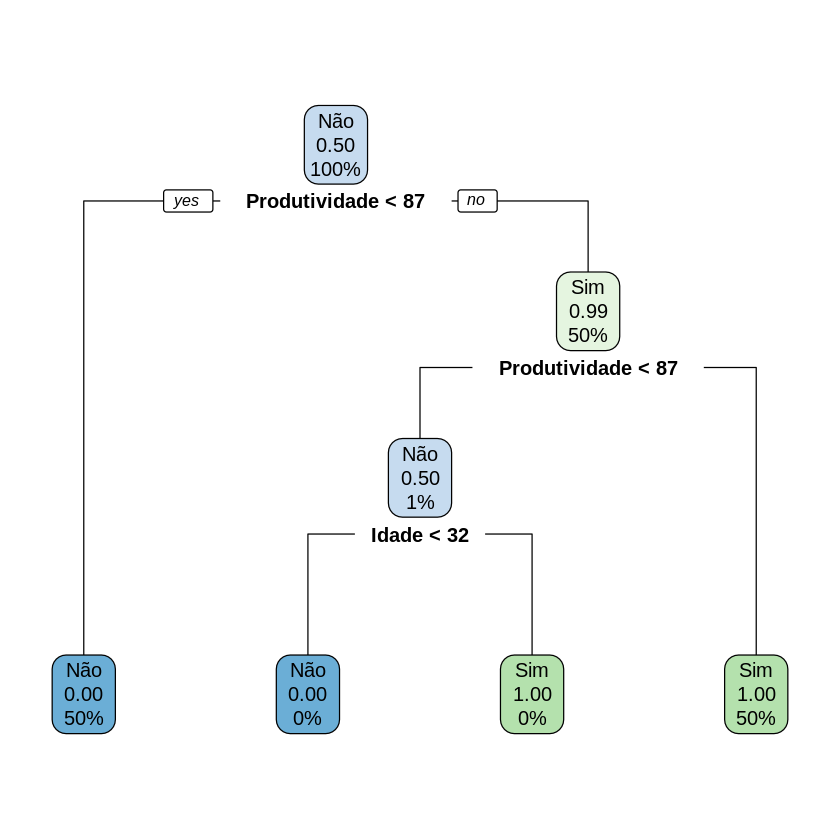

In [ ]:
# arvore resultante
rpart.plot(modelo)

# Classificação

In [ ]:
novo_cliente <- data.frame(

  	Idade	= 19,
    Gênero = 'Masculino',
    Departamento = 'TI',
    Salário = 5650.89,
    Horas_Trabalhadas =	86,
    Produtividade = 87.1,
    Satisfação =	190.90,
    Tempo_Empresa	= 11,
    Cursos_Realizados = 6
)
previsao <- predict(modelo, novo_cliente, type = "class")
previsao

1 
Sim 
Levels: Não Sim